
Exercises XP

Last Updated: February 16th, 2025

👩‍🏫 👩🏿‍🏫 What You'll learn

    The differences between traditional machine learning and deep learning.
    The structure and working of artificial neural networks (ANNs).
    How to generate, visualize, and analyze datasets with noise.
    Techniques for fitting polynomial regression models and understanding overfitting.
    The importance of cross-validation in model selection.


🛠️ What you will create

    A comparative table of traditional machine learning vs. deep learning.
    A simple artificial neural network (ANN) diagram with labeled components.
    A noisy dataset visualized using scatter plots.
    Polynomial regression models of varying degrees.
    A cross-validation analysis for optimal polynomial degree selection.


🌟 Exercise 1: Deep Learning vs. Traditional Machine Learning


Objective:

Understand the differences between traditional machine learning and deep learning.
Instructions:

1. Create a table comparing traditional machine learning and deep learning based on the following aspects:

    Feature Engineering
    Data Processing
    Scalability
    Pattern Discovery
    Computational Requirements

2. Identify one real-world problem where traditional ML is better suited and one where deep learning is the superior choice.
3. Write a short paragraph (3-5 sentences) explaining why deep learning has an advantage in unstructured data processing.


🌟 Exercise 2: Artificial Neural Networks (ANNs)


Objective:

Identify and understand the key components of an artificial neural network.
Instructions:

1. Draw (or use a diagram tool) to create a simple artificial neural network (ANN) with:

    An input layer (3 neurons)
    One hidden layer (4 neurons)
    An output layer (2 neurons)

2. Label the components of the network: neurons, weights, biases, activation function, and layers.
3. Write a short description (3-5 sentences) explaining how information flows through the network.


🌟 Exercise 3: Creating the Dataset and Visualizing the Data


Objective: Generate a dataset with noise and visualize it.
Instructions:

1. Import the necessary libraries: numpy, matplotlib.pyplot, and mean_squared_error from sklearn.metrics.
2. Create a set of 20 points using the formula ( y = -x^2 ), adding normally distributed noise with a mean of 0 and a standard deviation of 0.05 using np.random.normal.

Hint:

np.random.seed(0)
x = np.arange(-1, 1, 0.1)
y = -x**2 + np.random.normal(0, 0.05, len(x))


3. Plot the generated points using a scatter plot to visualize the dataset with noise.
4. Split the dataset into a training set (first 12 points) and a test set (last 8 points).


🌟 Exercise 4: Fitting Polynomial Models of Different Degrees


Objective: Fit polynomial models of varying degrees and observe overfitting.
Instructions:

1. Define a function polynomial_fit that takes a degree as input and returns a polynomial that best fits the training data.
2. Define another function plot_polyfit that plots the training set, test set, and the fitted polynomial curve for a given degree.
3. Use plot_polyfit to visualize the fit for polynomials of degree 1, 7, and 11.
4. Observe how the model behaves on the training and test sets as the degree of the polynomial increases.


🌟 Exercise 5: Cross-Validation to Find the Optimal Degree


Objective: Use cross-validation to determine the best polynomial degree.
Instructions:

1. Loop through polynomial degrees from 1 to 11.
2. For each degree, calculate the Root Mean Squared Error (RMSE) for both the training and test sets.
3. Store the results (degree, RMSE for training, RMSE for test) in a list.
4. Plot the RMSE values for both the training and test sets against the polynomial degree using a logarithmic scale for the y-axis.
5. Identify the degree that minimizes the RMSE on the test set and confirm that it corresponds to the true underlying model (( y = -x^2 )).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from numpy.polynomial import Polynomial
import math

In [ ]:
# données comparatives
data = {
    "Critère": [
        "Feature Engineering",
        "Data Processing",
        "Scalabilité",
        "Pattern Discovery",
        "Besoins calcul"
    ],
    "Machine Learning Traditionnel": [
        "manuel, guidé par expertise métier",
        "fonctionne bien avec peu de données",
        "rapide sur petits datasets",
        "limité à ce que l'on donne",
        "faibles, peut tourner sur CPU"
    ],
    "Deep Learning": [
        "automatique via couches cachées",
        "nécessite de grandes quantités de données",
        "plus lent, mais très scalable",
        "découvre des patterns complexes",
        "lourds, nécessite GPU/TPU"
    ]
}

# création du DataFrame
df = pd.DataFrame(data)

# affichage de la table
df.style.set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
)

,Critère,Machine Learning Traditionnel,Deep Learning
0,Feature Engineering,"manuel, guidé par expertise métier",automatique via couches cachées
1,Data Processing,fonctionne bien avec peu de données,nécessite de grandes quantités de données
2,Scalabilité,rapide sur petits datasets,"plus lent, mais très scalable"
3,Pattern Discovery,limité à ce que l’on donne,découvre des patterns complexes
4,Besoins calcul,"faibles, peut tourner sur CPU","lourds, nécessite GPU/TPU"


Deep learning est meilleur pour les données non structurées (texte, image, audio) car il apprend automatiquement des représentations pertinentes via les couches cachées. Il n’a pas besoin qu’on extraie à la main les bons features. Ça simplifie beaucoup et surtout, ça permet de traiter des patterns très complexes.

Exo 2

Réseau avec 3 neurones en entrée, 1 couche cachée de 4, et 2 en sortie.

Chaque neurone est connecté à ceux de la couche suivante via des poids.

Chaque connexion a un poids ; chaque neurone a un biais.

L'info circule de gauche à droite : input -> poids + biais -> activation -> output.

L'activation (genre ReLU ou softmax) décide si un neurone s'active.

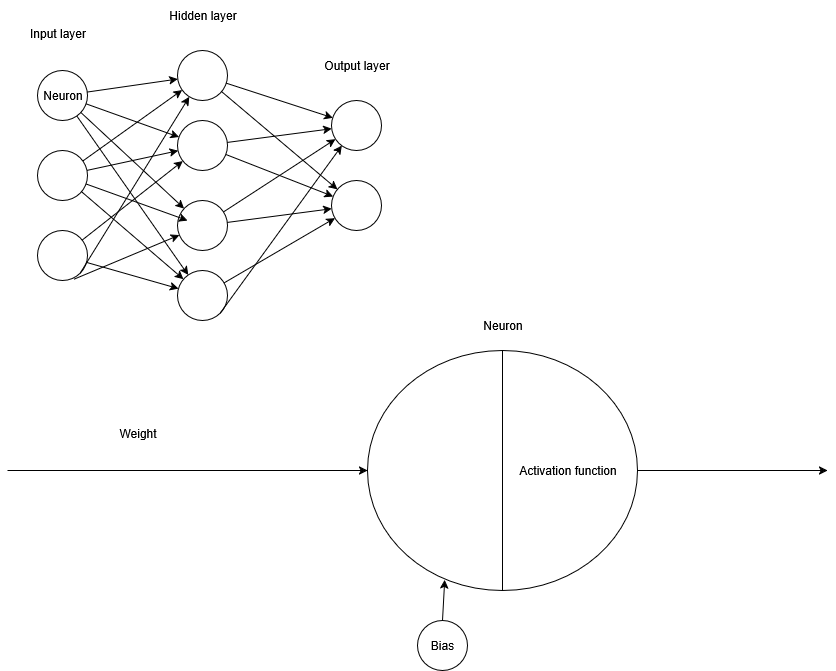

In [8]:
from IPython.display import Image
Image(filename="Diagrammedrawio.png")  # ou .svg

exo 3

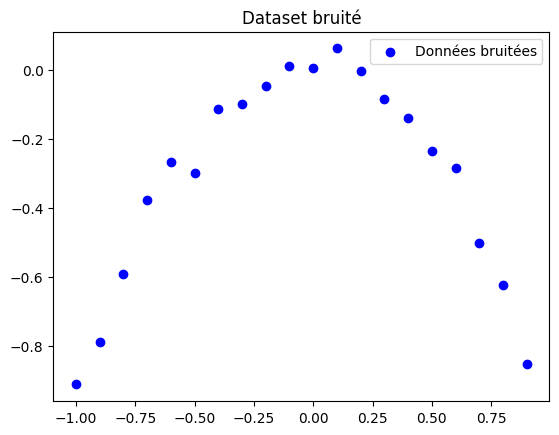

In [ ]:
#on fixe le seed pr reproductibilité
np.random.seed(0)
x = np.arange(-1, 1, 0.1)
# on ajoute du bruit normal sur y = -x²
y = -x**2 + np.random.normal(0, 0.05, len(x))

# visu rapide
plt.scatter(x, y, c='blue', label='Données bruitées')
plt.title("Dataset bruité")
plt.legend()
plt.show()

# split train/test
x_train, y_train = x[:12], y[:12]
x_test, y_test = x[12:], y[12:]

on a les données, on voit le bruit -> ça va forcer les modèles à s’adapter mais attention à l'overfitting

exo 4

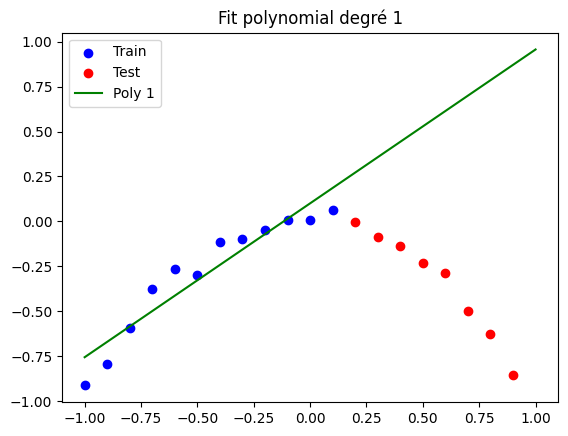

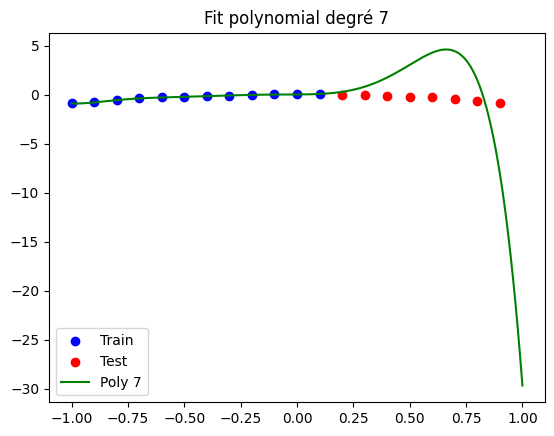

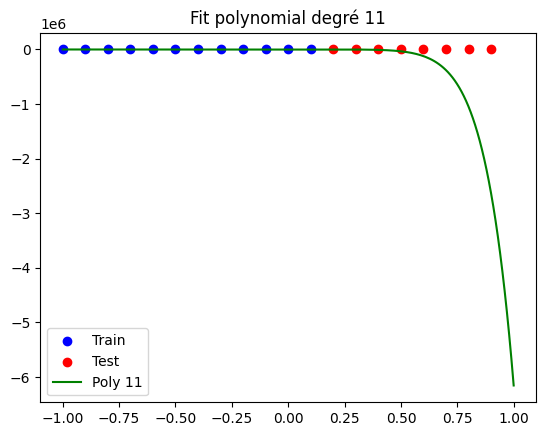

In [5]:
# on fait une fonction fit + une visu
def polynomial_fit(degree):
    return Polynomial.fit(x_train, y_train, degree)

def plot_polyfit(degree):
    model = polynomial_fit(degree)
    x_curve = np.linspace(-1, 1, 200)
    y_curve = model(x_curve)

    plt.scatter(x_train, y_train, c='blue', label='Train')
    plt.scatter(x_test, y_test, c='red', label='Test')
    plt.plot(x_curve, y_curve, label=f'Poly {degree}', color='green')
    plt.legend()
    plt.title(f'Fit polynomial degré {degree}')
    plt.show()

# visu sur degrés 1, 7, 11
for d in [1, 7, 11]:
    plot_polyfit(d)

degré 1 -> trop simple -> sous-apprend.

degré 7 -> bon fit visuellement.

degré 11 -> surfit complet -> épouse le bruit, test à la ramasse.

Exo 5

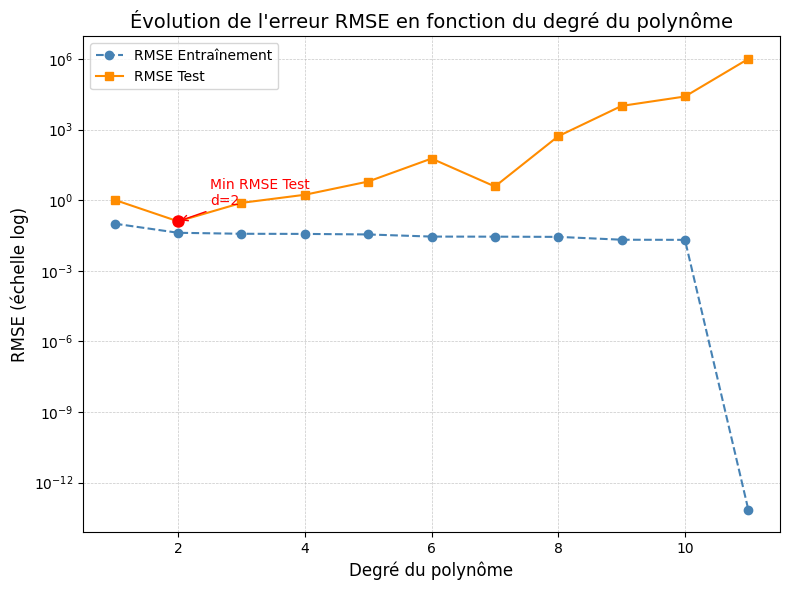

In [9]:
results = []

for d in range(1, 12):
    model = polynomial_fit(d)
    y_train_pred = model(x_train)
    y_test_pred = model(x_test)
    
    rmse_train = math.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = math.sqrt(mean_squared_error(y_test, y_test_pred))
    
    results.append((d, rmse_train, rmse_test))

# on plot ça

degrees = [r[0] for r in results]
rmse_train = [r[1] for r in results]
rmse_test = [r[2] for r in results]

plt.figure(figsize=(8, 6))
plt.plot(degrees, rmse_train, label='RMSE Entraînement', marker='o', linestyle='--', color='steelblue')
plt.plot(degrees, rmse_test, label='RMSE Test', marker='s', linestyle='-', color='darkorange')

plt.yscale('log')

plt.title("Évolution de l'erreur RMSE en fonction du degré du polynôme", fontsize=14)
plt.xlabel("Degré du polynôme", fontsize=12)
plt.ylabel("RMSE (échelle log)", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(fontsize=10)

# calcul du minimum sur test
min_deg = degrees[rmse_test.index(min(rmse_test))]
min_val = min(rmse_test)

# ajout d’un point bien visible + texte décalé
plt.plot(min_deg, min_val, 'ro', markersize=8, label='Min Test RMSE')
plt.annotate(f'Min RMSE Test\nd={min_deg}', 
             xy=(min_deg, min_val), 
             xytext=(min_deg + 0.5, min_val * 5), 
             arrowprops=dict(arrowstyle="->", color='red'),
             fontsize=10, color='red')

plt.tight_layout()
plt.show()

La courbe bleue (train) reste très basse → le modèle apprend toujours bien sur le training.

La courbe orange (test) descend, atteint un minimum (meilleur degré), puis remonte → overfitting.

Le point rouge indique le degré optimal = celui qui généralise le mieux.